# Analysis and Visualizations of Restaurant reviews and Prediction using Natural Language Processing  & Machine Learning Algorithms.

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

In [7]:
## Reading the dataset from Kaggle
df=pd.read_csv('restaurant reviews data.csv')

In [8]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## _Checking for Null values_

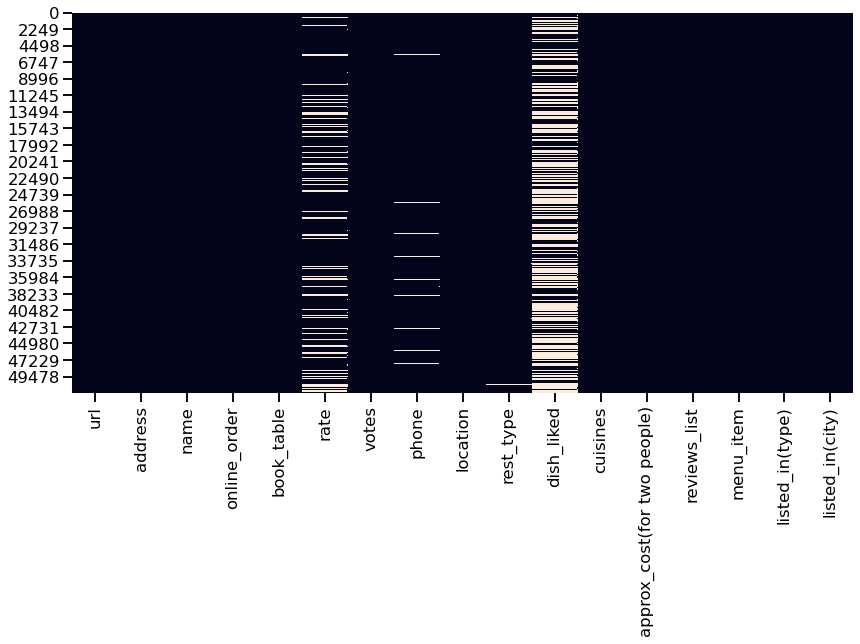

In [11]:
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull(), cbar=False)
sns.set_context('paper')

In [12]:
## Dropping Null values :

df = df.dropna()

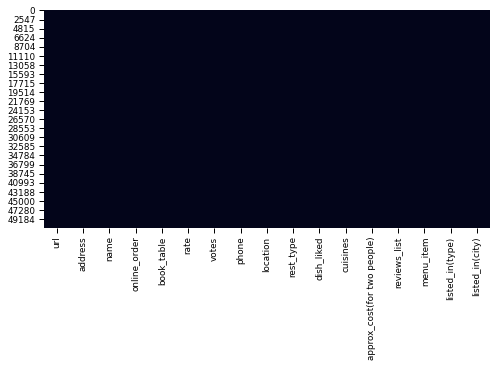

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)

Now, no null values ! 

---

# _Exploratory Data Analysis_

In [16]:
df.describe()

,votes
count,23193.000000
mean,601.074462
std,1114.854301
min,0.000000
25%,101.000000
50%,221.000000
75%,586.000000
max,16832.000000


In [17]:
df.shape

(23193, 17)

### _Dropping some unnecessary columns_

In [18]:
df.drop(['url','phone','dish_liked'],axis=1,inplace=True)

In [19]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df=df.rename(columns={'approx_cost(for two people)':'cost'})

In [22]:
## Removing comma
df['cost']=df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)

In [23]:
## Changing rate to just show the data without '/5'
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')

In [24]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### _One Hot Encoding_

In [26]:
def Encoding(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

dfn = Encoding(df.copy())

In [27]:
dfn.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


### _Finding Correlations :_

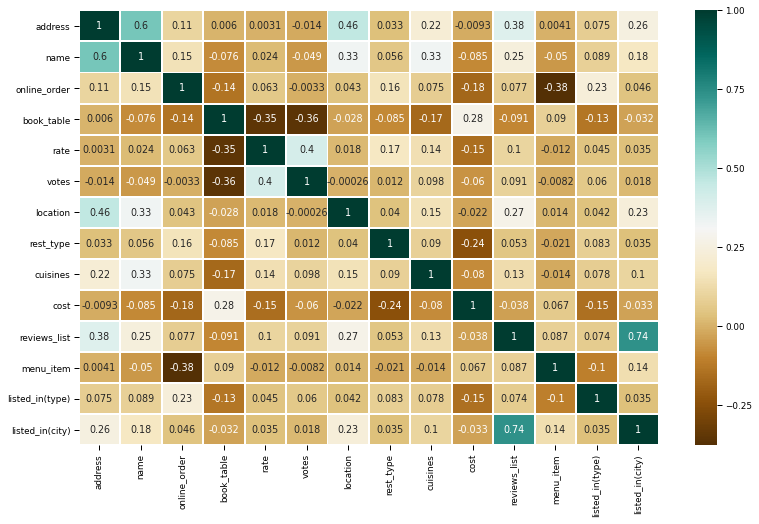

In [30]:
corr = dfn.corr(method='kendall')
plt.figure(figsize=(13,8))

sns.heatmap(corr, annot=True, cmap="BrBG", linewidths=.9)

# _Visualizations_

Text(0.5, 1.0, 'Different Types of Restaurants :')

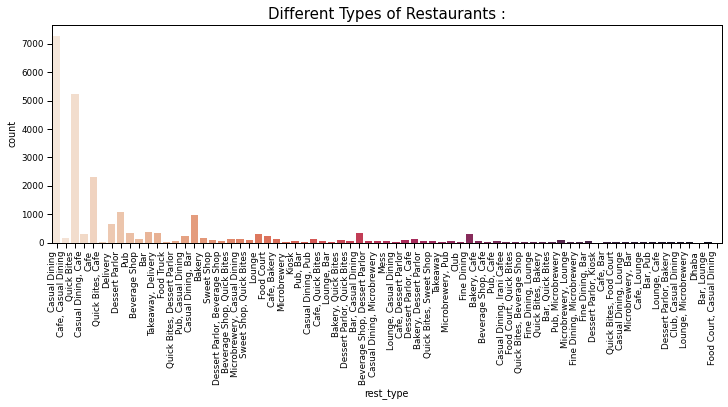

In [34]:
plt.figure(figsize=(12,4))
g = sns.countplot(x='rest_type',data=df, palette='rocket_r')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title("Different Types of Restaurants :", size =15)

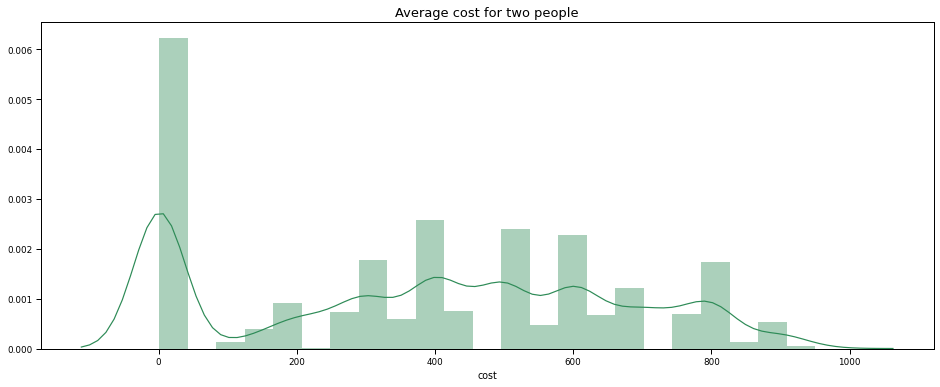

In [54]:
plt.figure(figsize=(16,6))
sns.distplot(df['cost'], color = 'seagreen')
plt.title('Average cost for two people', size = 13)
plt.show()

Text(0.5, 1.0, 'Restaurants Available for Online Delivery of Food :')

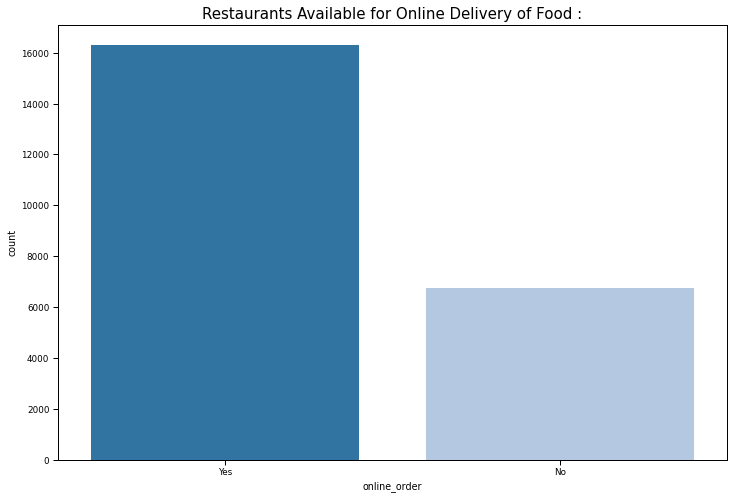

In [53]:
plt.figure(figsize=(12,8))
g = sns.countplot(x='online_order',data=df, palette='tab20')
plt.title("Restaurants Available for Online Delivery of Food :", size =15)

Text(0.5, 1.0, 'Location of Restaurants in Bangalore')

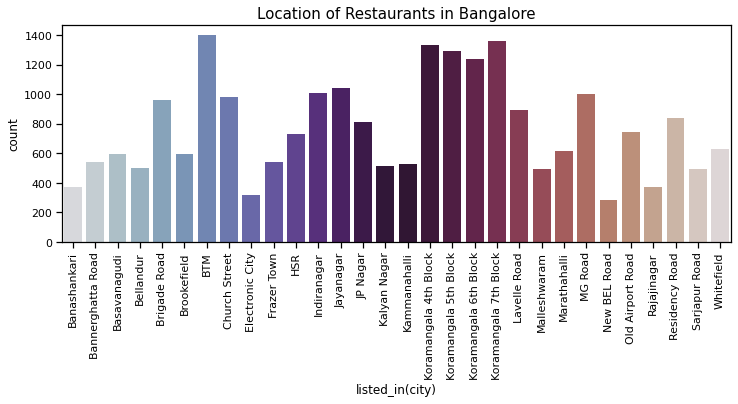

In [66]:
plt.figure(figsize=(12,4))
g=sns.countplot(x='listed_in(city)',data=df, palette='twilight')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Location of Restaurants in Bangalore", size =15)


Text(0.5, 0, 'Number of Restaurants ')

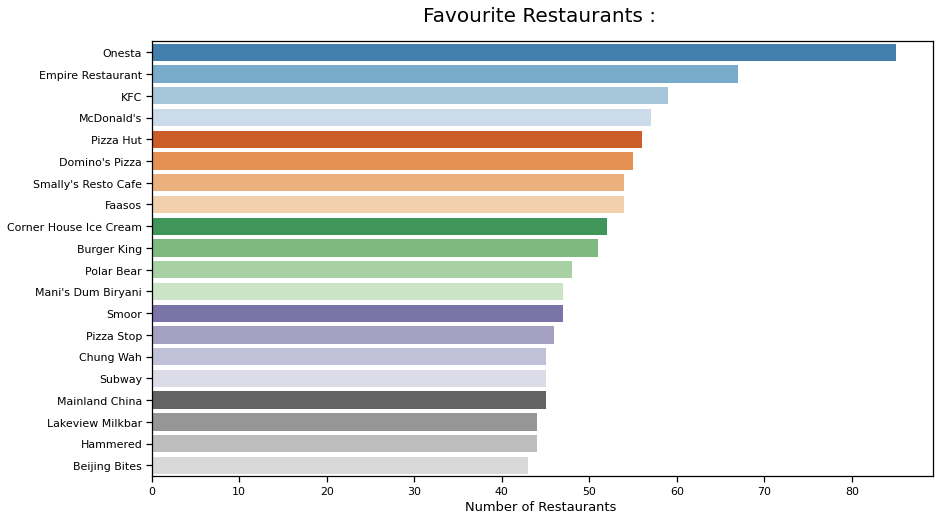

In [78]:
plt.figure(figsize=(14,8))
fav_res=df['name'].value_counts()[:20]
sns.barplot(x=fav_res,y=fav_res.index,palette='tab20c')
plt.title("Favourite Restaurants : ",size=20,pad=20)
plt.xlabel("Number of Restaurants ",size=13)

Text(0.5, 1.0, 'Types of Services offered : ')

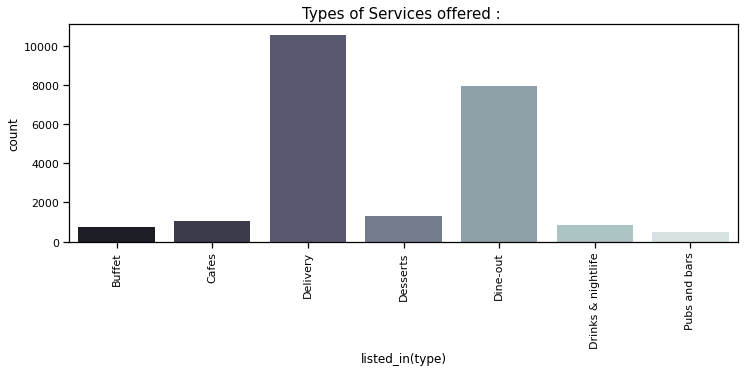

In [68]:
plt.figure(figsize=(12,4))
g=sns.countplot(x='listed_in(type)',data=df, palette='bone')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Types of Services offered : ", size =15)

# Now, for Prediction of Ratings  :

In [79]:
dfn.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


## _Independent and dependent Features_

In [81]:
dfn.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [82]:
X = dfn.iloc[:,[2,3,5,6,7,8,9,11]]

In [83]:
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,0,0,775,0,0,0,800.0,0
1,0,1,787,0,0,1,800.0,0
2,0,1,918,0,1,2,800.0,0
3,1,1,88,0,2,3,300.0,0
4,1,1,166,1,0,4,600.0,0


In [84]:
y = dfn['rate']

In [85]:
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

### _Train-Test Split_

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=300)

# Training the Model

## _Using RandomForestRegressor_

In [88]:
from sklearn.ensemble import RandomForestRegressor


In [89]:
rfr=RandomForestRegressor(n_estimators=500,random_state=270,min_samples_leaf=.0001)

In [90]:
rfr.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=0.0001, n_estimators=500,
                      random_state=270)

In [91]:
predict=rfr.predict(X_test)

In [92]:
predict

array([3.83202414, 3.40453307, 3.81845616, ..., 3.85457479, 3.9981377 ,
       3.6831501 ])

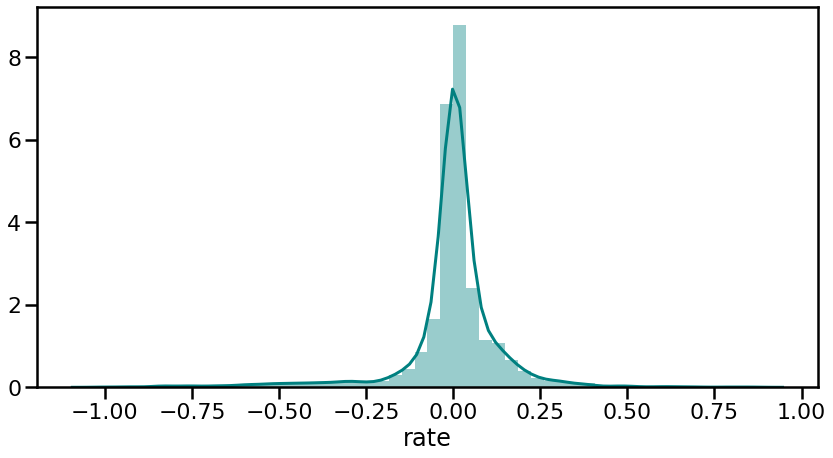

In [103]:
plt.figure(figsize=(14,7))
sns.set_context("poster")
sns.distplot(y_test-predict, color ="teal")

### _Here, we can see a Normal Distribution Curve which shows the Prediction of our Model !_

---

## _Plotting the Best  Fit Line for this Model_

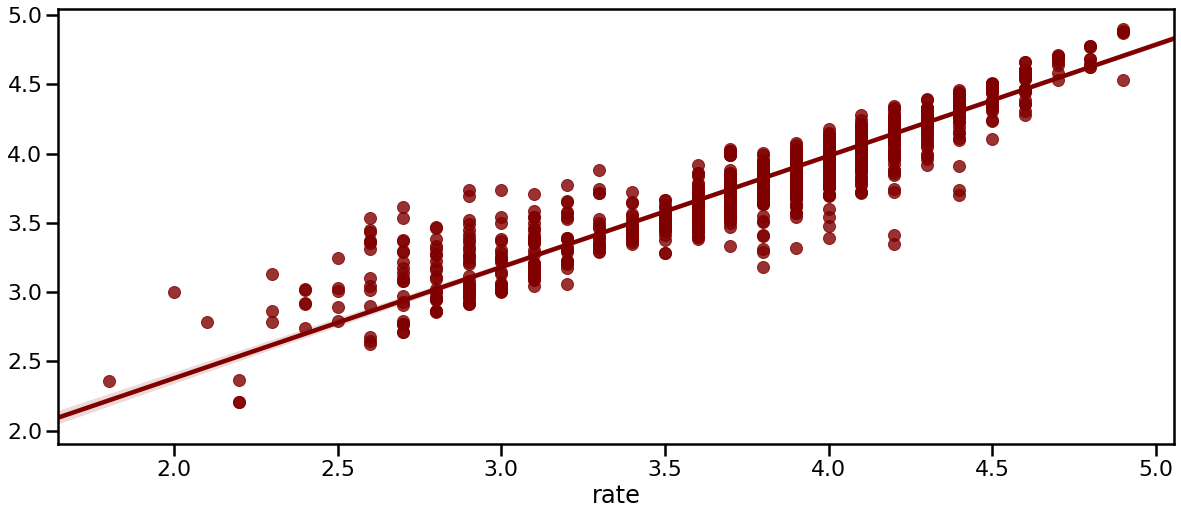

In [105]:
plt.figure(figsize=(20,8))
sns.set_context('poster')
sns.regplot(y_test,predict, color ='maroon')

In [108]:
 from sklearn import metrics

In [109]:
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict))

Mean Absolute Error: 0.0732155355213559


In [110]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

Root Mean Squared Error: 0.145622098182963


---

# _Using ExtraTreeRegressor_

In [106]:
from sklearn.ensemble import  ExtraTreesRegressor

In [111]:
etr=ExtraTreesRegressor(n_estimators = 120)

In [113]:
etr.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [114]:
etr_pred=etr.predict(X_test)

In [116]:
etr_pred

array([4.05916667, 3.4       , 4.0675    , ..., 3.88861111, 4.        ,
       3.7       ])

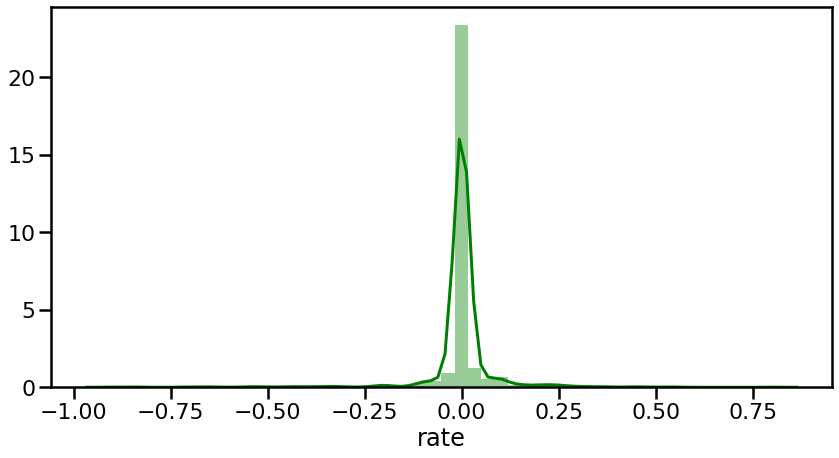

In [118]:
plt.figure(figsize=(14,7))
sns.set_context("poster")
sns.distplot(y_test-etr_pred, color ="green")

### _And the Best Fit Line will be :_

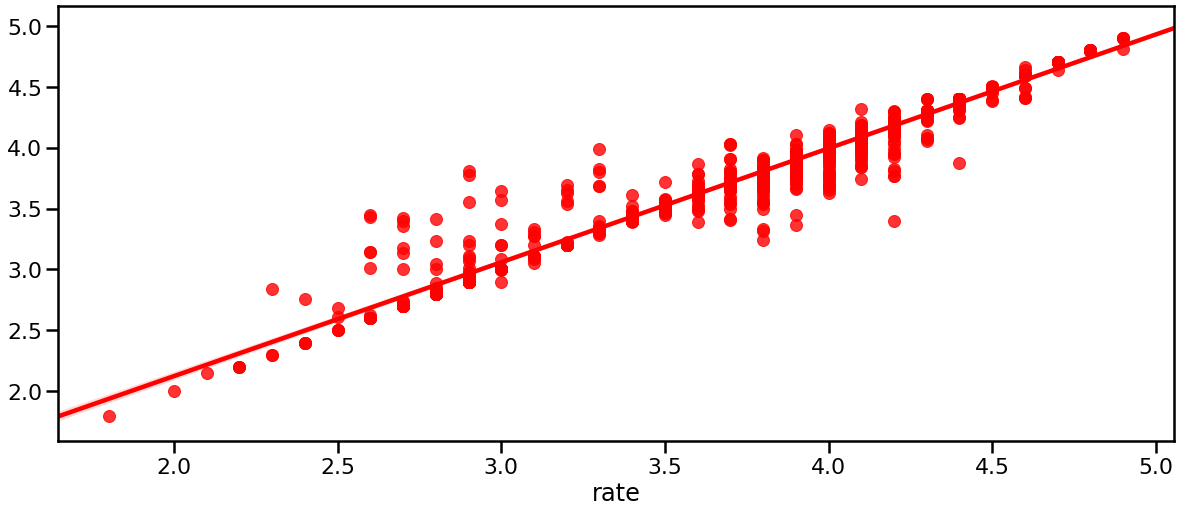

In [120]:
plt.figure(figsize=(20,8))
sns.set_context('poster')
sns.regplot(y_test,etr_pred, color ='red')

In [121]:
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, etr_pred))

Mean Absolute Error: 0.027536719853862867


In [122]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, etr_pred)))

Root Mean Squared Error: 0.09124937537377993


---

# _From the above two trained Models, It can be seen that the ExtratreesRegressor model performed better than the RandomForestRegressor Model._